<a href="https://colab.research.google.com/github/Methelesh-Suresh/Machine-Learning/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

### **Upload the dataset**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of 50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [6]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### **EDA**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

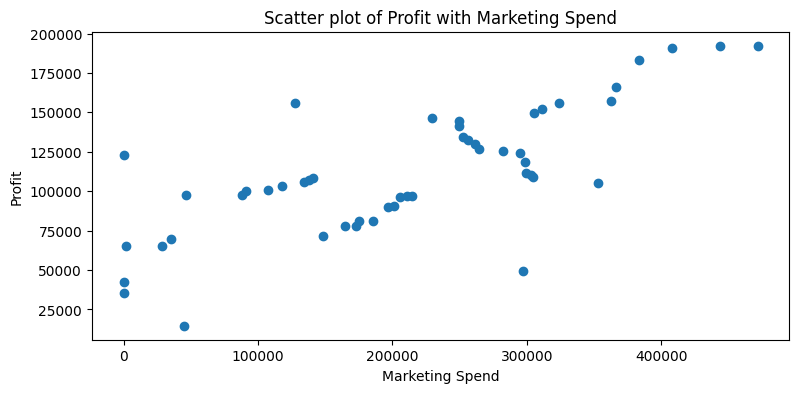

In [9]:
plt.figure(figsize=(9, 4))
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

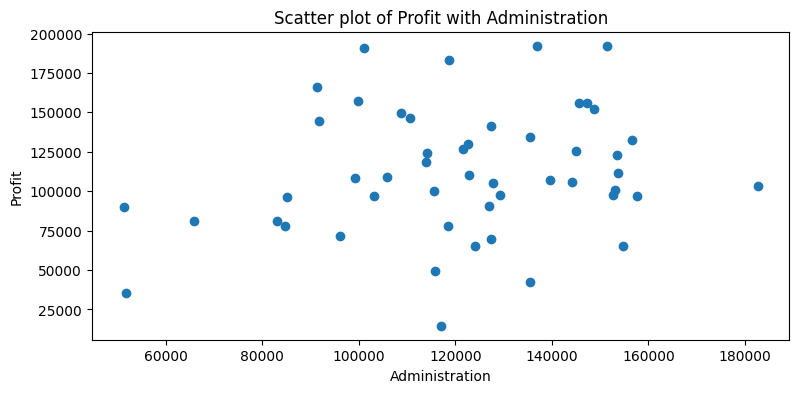

In [10]:
plt.figure(figsize=(9, 4))
plt.scatter(df['Administration'],df['Profit'])
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

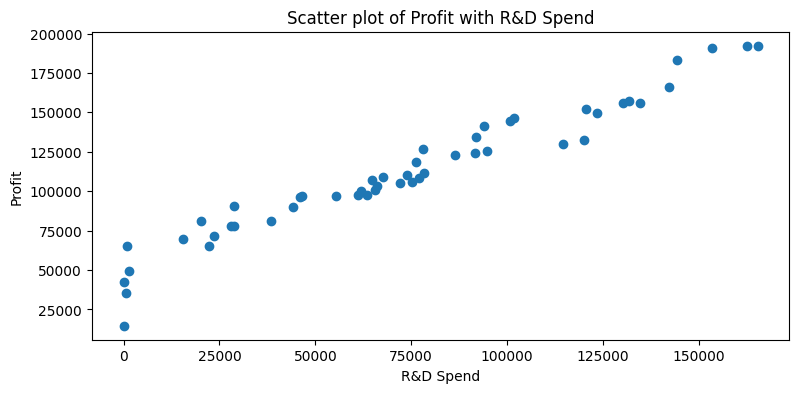

In [11]:
plt.figure(figsize=(9, 4))
plt.scatter(df['R&D Spend'],df['Profit'])
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

<Axes: xlabel='State'>

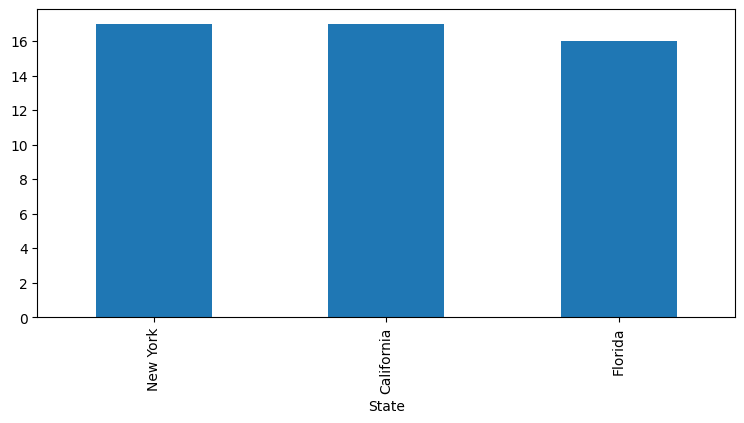

In [12]:
plt.figure(figsize=(9, 4))
df['State'].value_counts().plot(kind = 'bar')

<Axes: xlabel='State'>

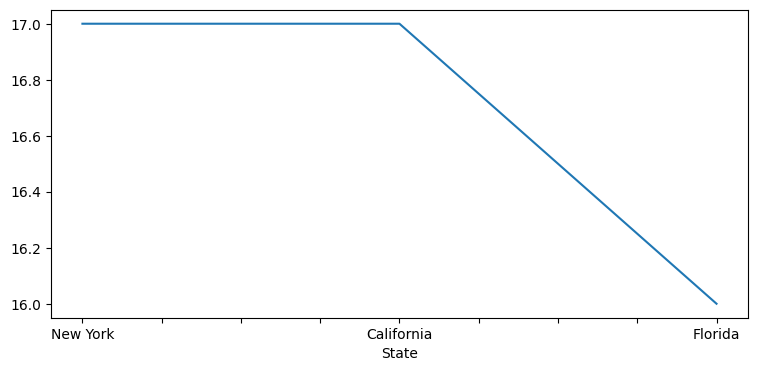

In [13]:
plt.figure(figsize=(9, 4))
df['State'].value_counts().plot(kind = 'line')

<Axes: ylabel='count'>

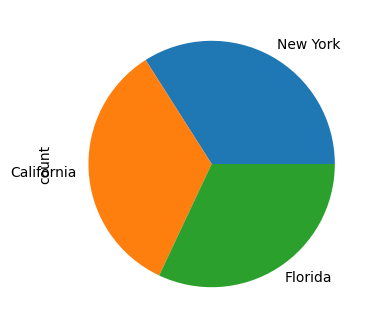

In [14]:
plt.figure(figsize=(9, 4))
df['State'].value_counts().plot(kind = 'pie')

### **data pre-processing**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
df['State']

,State
0,New York
1,California
2,Florida
3,New York
4,Florida
5,New York
6,California
7,Florida
8,New York
9,California


In [19]:
df['NewYork_State'] = np.where(df['State']=='New York', 1, 0)
df['California_State'] = np.where(df['State']=='California', 1, 0)
df['Florida_State'] = np.where(df['State']=='Florida', 1, 0)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [20]:
df.drop(['State'], axis=1, inplace=True)

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


### **Split the dataset into train and test**

In [22]:
x = df.drop(['Profit'], axis=1)
y = df['Profit']

In [23]:
x.head()

,R&D Spend,Administration,Marketing Spend,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [24]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=42)

In [26]:
print('features of train datset ', x_train.shape)
print('features of test datset ', x_test.shape)
print('target of train datset ', y_train.shape)
print('target of test datset ', y_test.shape)


features of train datset  (40, 6)
features of test datset  (10, 6)
target of train datset  (40,)
target of test datset  (10,)


### **Model implimantation**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
model.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -3.08272495e+02,
       -3.15260255e+02,  6.23532751e+02])

In [32]:
train_pred = model.predict(x_train)
print(train_pred[:5])

[129287.25932268 174098.25202593  91886.85822583 150220.99659018
 173623.19035613]


In [33]:
print(y_train[:5])

[141585.52 166187.94  89949.14 152211.77 182901.99]


In [34]:
test_pred = model.predict(x_test)
print(test_pred[:5])

[126362.87908255  84608.45383633  99677.49425146  46357.46068582
 128750.48288505]


In [35]:
print(y_test[:5])

[134307.35  81005.76  99937.59  64926.08 125370.37]


### **Model accuracy**

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [37]:
print('train data mean squared error ', mean_squared_error(y_train, train_pred))
print('train data mean absolute error ', mean_absolute_error(y_train, train_pred))
print('train data mean absolute percentage error ', mean_absolute_percentage_error(y_train, train_pred)*100)

print(' ')
print('*'*80)
print(' ')


print('test data mean squared error ', mean_squared_error(y_test, test_pred))
print('test data mean absolute error ', mean_absolute_error(y_test, test_pred))
print('test data mean absolute percentage error ', mean_absolute_percentage_error(y_test, test_pred)*100)

train data mean squared error  79700060.0825932
train data mean absolute error  6662.656240897505
train data mean absolute percentage error  10.94775697210343
 
********************************************************************************
 
test data mean squared error  82010363.04423544
test data mean absolute error  6961.477813250244
test data mean absolute percentage error  10.278189896347763
